---
# Лабораторна робота №10. Стиснення даних. Жадібна стратегія на прикладі кодування Гафмена.
Author - Kyrylo Klingen
---

# Мета :навчитись реалізовувати алгоритм побудови дерева оптимальних кодів Гафмена на основі черги з пріоритетом (за допомогою купи) засобами Python.

# 1 . Побудувати дерево кодів Гафмена згідно з варіантом, виданим викладачем вручну і візуалізувати дерево.

Для цього завдання було взято такий варіант ABACABBCACBCABADABAC.Кількість кожного символу A = 8, B = 6 , C = 5, D = 1.Витягуємо дві вершини з найменшою частотою , а це в нас 5(C) та 1(D).Створюємо новий внутрішній вузол з частотою, що дорівнює сумі частот цих двох вузлі , робимо першу вилучену вершину її лівим дочірнім елементом, а другу – правим дочірнім елементом. Додаємо цю вершину до мінімальної купи та повторюємо до поки не пройдемо всі вершини.Результат наведено на цій картинках , їх наведно 2 в залежность від того з якої сторони ми визначаємо 0 та 1 , але фактично результат той самий.

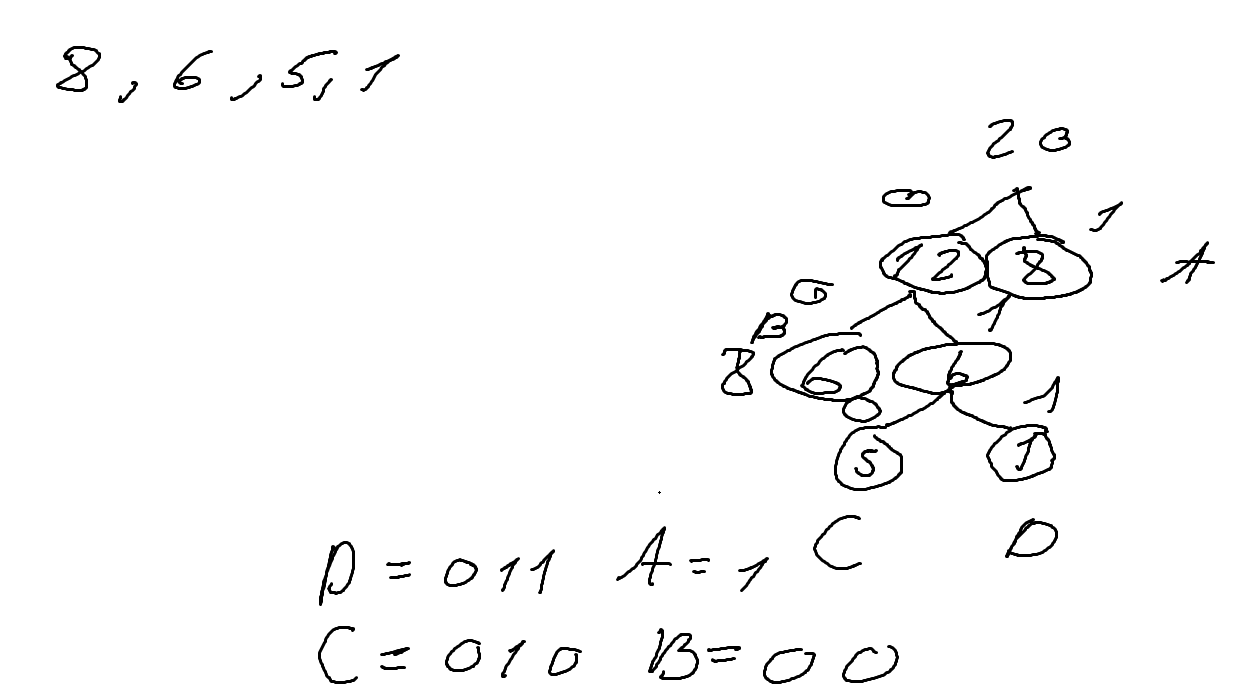

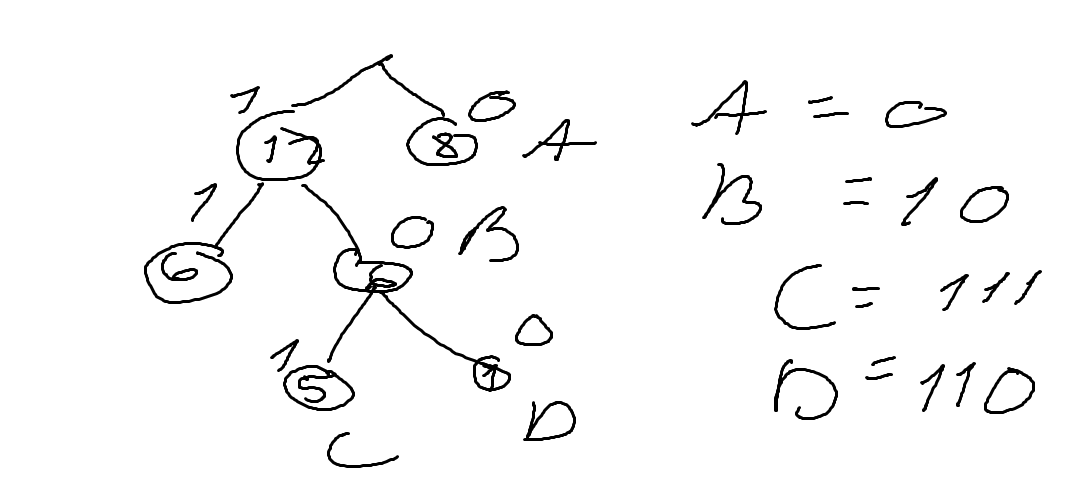

# 2 . Перевірити результат за допомогою коду, наведеному вище.

In [2]:
import heapq

class node:
    def __init__(self, freq, symbol, left=None, right=None):
        # частота символу
        self.freq = freq

        # назва символу (символ)
        self.symbol = symbol

        # вузол ліворуч від поточного вузла
        self.left = left

        # вузол праворуч від поточного вузла
        self.right = right

        # напрямок дерева (0/1)
        self.huff = ''

    def __lt__(self, nxt):
        return self.freq < nxt.freq

# утиліта для виведення кодів Гафмена для
# всіх символів у щойно створеному дереві Гафмена
def printNodes(node, val=''):
    # Код Гафмена для поточного вузла
    newVal = val + str(node.huff)

    # якщо вершина не є реберною вершиною
    # то пройти всередині неї
    if(node.left):
        printNodes(node.left, newVal)
    if(node.right):
        printNodes(node.right, newVal)

    # якщо node є реберною вершиною тоді
    # вивести його хаффманівський код
    if(not node.left and not node.right):
        print(f"{node.symbol} -> {newVal}")

# символи для дерева Гафмена
chars = ['a', 'b', 'c', 'd']

# частота символів
freq = [8, 6, 5, 1]

# список, що містить невикористані вершини
nodes = []

# перетворення символів та частот
# у вузли дерева Гафмена
for x in range(len(chars)):
    heapq.heappush(nodes, node(freq[x], chars[x]))

while len(nodes) > 1:
    # відсортувати всі вершини за зростанням
    # на основі їх частоти
    left = heapq.heappop(nodes)
    right = heapq.heappop(nodes)

    # присвоїти значення напрямку цим вузлам
    left.huff = 0
    right.huff = 1

    # об'єднати 2 найменші вершини, щоб створити
    # новий вузол як їхній батько
    newNode = node(left.freq+right.freq, left.symbol+right.symbol, left, right)
    heapq.heappush(nodes, newNode)

# Друк кодів Гафмена
printNodes(nodes[0])


a -> 0
b -> 10
d -> 110
c -> 111


# 3 . Написати процедуру на Python, яка для вхідного повідомлення обчислює список символів chars та список їх частот freq.

In [4]:
from collections import Counter

def calculate_char_frequencies(message):
    
    if not isinstance(message, str):
        raise TypeError("Вхідне повідомлення повинно бути рядком.")
    if not message:
        return [], []

    # Використовуємо Counter для підрахунку частоти кожного символу
    char_counts = Counter(message)

    # Розділяємо ключі (символи) та значення (частоти) на окремі списки
    chars = list(char_counts.keys())
    freq = list(char_counts.values())

    return chars, freq

# Приклад використання:
message1 = "ABACABBCACBCABADABAC"
chars1, freq1 = calculate_char_frequencies(message1)
print(f"Повідомлення: '{message1}'")
print(f"Символи: {chars1}")
print(f"Частоти: {freq1}")

Повідомлення: 'ABACABBCACBCABADABAC'
Символи: ['A', 'B', 'C', 'D']
Частоти: [8, 6, 5, 1]


# 4 . Декодування Гаффмена.

In [6]:
import heapq
from collections import defaultdict

# to map each character its huffman value
codes = {}

# To store the frequency of character of the input data
freq = defaultdict(int)

# A Huffman tree node
class MinHeapNode:
    def __init__(self, data, freq):
        self.left = None
        self.right = None
        self.data = data
        self.freq = freq

    def __lt__(self, other):
        return self.freq < other.freq

# utility function to print characters along with
# there huffman value
def printCodes(root, str):
    if root is None:
        return
    if root.data != '$':
        print(root.data, ":", str)
    printCodes(root.left, str + "0")
    printCodes(root.right, str + "1")

# utility function to store characters along with
# there huffman value in a hash table
def storeCodes(root, str):
    if root is None:
        return
    if root.data != '$':
        codes[root.data] = str
    storeCodes(root.left, str + "0")
    storeCodes(root.right, str + "1")

# function to build the Huffman tree and store it
# in minHeap
def HuffmanCodes(size):
    global minHeap
    for key in freq:
        minHeap.append(MinHeapNode(key, freq[key]))
    heapq.heapify(minHeap)
    while len(minHeap) != 1:
        left = heapq.heappop(minHeap)
        right = heapq.heappop(minHeap)
        top = MinHeapNode('$', left.freq + right.freq)
        top.left = left
        top.right = right
        heapq.heappush(minHeap, top)
    storeCodes(minHeap[0], "")

# utility function to store map each character with its
# frequency in input string
def calcFreq(str, n):
    for i in range(n):
        freq[str[i]] += 1

# function iterates through the encoded string s
# if s[i]=='1' then move to node->right
# if s[i]=='0' then move to node->left
# if leaf node append the node->data to our output string
def decode_file(root, s):
    ans = ""
    curr = root
    n = len(s)
    for i in range(n):
        if s[i] == '0':
            curr = curr.left
        else:
            curr = curr.right

        # reached leaf node
        if curr.left is None and curr.right is None:
            ans += curr.data
            curr = root
    return ans + '\0'

# Driver code
if __name__ == "__main__":
    minHeap = []
    str = "Lobotomy E.G.O::Red Eyes & Penitence"
    encodedString, decodedString = "", ""
    calcFreq(str, len(str))
    HuffmanCodes(len(str))
    print("Character With there Frequencies:")
    for key in sorted(codes):
        print(key, codes[key])

    for i in str:
        encodedString += codes[i]

    print("\nEncoded Huffman data:")
    print(encodedString)

    # Function call
    decodedString = decode_file(minHeap[0], encodedString)
    print("\nDecoded Huffman Data:")
    print(decodedString)

Character With there Frequencies:
  1111
& 10000
. 0100
: 0011
E 1011
G 01111
L 01110
O 10100
P 00001
R 01011
b 01101
c 00000
d 01100
e 110
i 01010
m 10101
n 0001
o 1110
s 10001
t 0010
y 1001

Encoded Huffman data:
0111011100110111100010111010101100111111011010001111010010100001100110101111001100111110111001110100011111100001111000011100001010100010110000100000110

Decoded Huffman Data:
Lobotomy E.G.O::Red Eyes & Penitence 


# 5 . Контрольні питання.

* Що таке жадібні алгоритми? - це евристичний метод для знаходження наближеного розв’язку екстремальних задач.
  
* Що таке префіксний код? Який код використовується у коді Гафмена? - префіксні коди - це ті коди що присвоюються таким чином , що код присвоєного символу , не є префіксом коду іншого символу.Саме префіксний код і використовується в кодуванні Гафмена.

* Як пов’язана структура даних «купа» зі структурою даних «черга з пріоритетами»? - фактично купа це один з видів реалізації черги з пріорітетами , і там і там ми працюємо саме за пріоритетом певних даних.

*  Що таке стиснення даних і для чого воно використовується? Які його основні переваги? - стиснення даних це процес зменшення розміру файлу без втрати даних (або з невеликою втратою).Використовується для економії місця на носії , прискорення передачі цих даних.Переваги - економить місце на носії , прискорює передачу даних , збільшення ємності резервного пакування.

* Які кроки необхідно виконати для стиснення даних за допомогою алгоритму кодування Гафмена? - Витягуємо дві вершини з найменшою частотою.Створюємо новий внутрішній вузол з частотою, що дорівнює сумі частот цих двох вузлі , робимо першу вилучену вершину її лівим дочірнім елементом, а другу – правим дочірнім елементом. Додаємо цю вершину до мінімальної купи та повторюємо до поки не пройдемо всі вершини.Зліва ставимо 0 , справа 1 і так з кожною вершиною.Прохидимо по них та отримуємо код символу.


* Які основні обмеження та недоліки алгоритму кодування Гафмена? Чи можливо покращити його продуктивність? - Обмеження та недоліки : Потрібен попередній прохід для обчислення частот , не адаптивний , необхідність зберігання таблиці кодів.Так можна , використати адаптивне кодування Гафмена , яке усуває необхідність попереднього проходу , або використати в поєднанні з іншими алгоритмами.

* Які існують альтернативні методи стиснення даних, що можуть конкурувати з алгоритмом Гафмена? - Алгоритми Лемпеля-Зіва , арифметичне кодування , кодування Барроуза-Вілера.

* Які практичні застосування можуть мати алгоритми стиснення даних, зокрема алгоритм Гафмена, у сучасних інформаційних системах? - стиснення файлів , мультимедійні формати , бази даних.


# 6 . Висновки.

На цій лабораторній роботі ми навчились реалізовувати алгоритм побудови дерева оптимальних кодів Гафмена на основі черги з пріоритетом (за допомогою купи) засобами Python.